In [1]:
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

--2022-12-19 11:29:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K  1.20MB/s    in 0.3s    

2022-12-19 11:29:38 (1.20 MB/s) - ‘arrhythmia.data’ saved [402355/402355]



In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6,6]
from pandas.plotting import scatter_matrix

df = pd.read_csv('arrhythmia.data',header=None)
df.head()

2.9.2


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe413a2d7f0>,
      dtype=object)

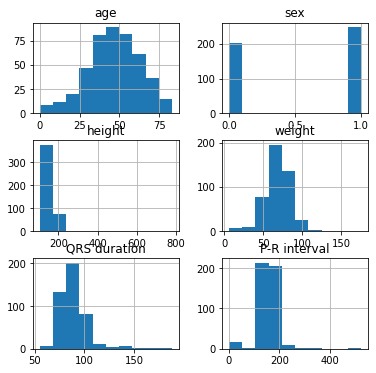

In [3]:
data = df[[0,1,2,3,4,5]]
data.columns = ["age","sex","height","weight","QRS duration","P-R interval"]

data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe413771130>,
      dtype=object)

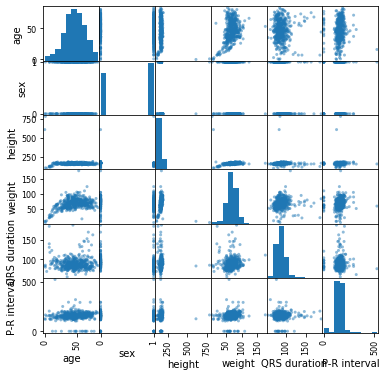

In [4]:
scatter_matrix(data)

#USING tf.keras

In [5]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/auto-mpg.data'

In [6]:
tf.keras.utils.get_file('auto-mpg.data',url)

30286/30286 [==============================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [7]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [8]:
df1 = pd.read_csv('/root/.keras/datasets/auto-mpg.data',header=None,delim_whitespace=True)
df1.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#Upload the file iteself

#MACHINE LEARNING AND NEURONS

In [9]:
try:
  %tensorflow version 2.x
except Exception:
   pass 

import tensorflow as tf
print(tf.__version__)     

2.9.2


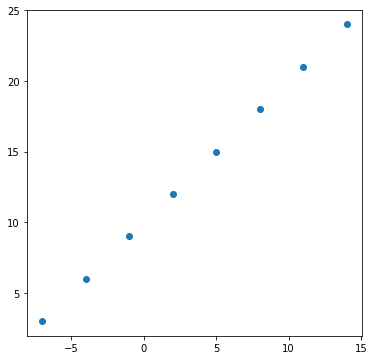

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

# Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [11]:
#Set the Random seed 
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 729ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 18ms/step -

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 262ms/step


array([[26.206875]], dtype=float32)

#MAke a large dataset

In [13]:
X = tf.range(-100,100,4)
y = X + 10

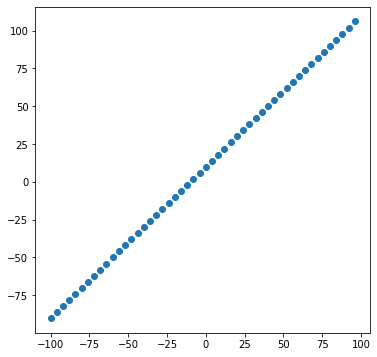

In [14]:
plt.scatter(X,y)

In [15]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

#Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.



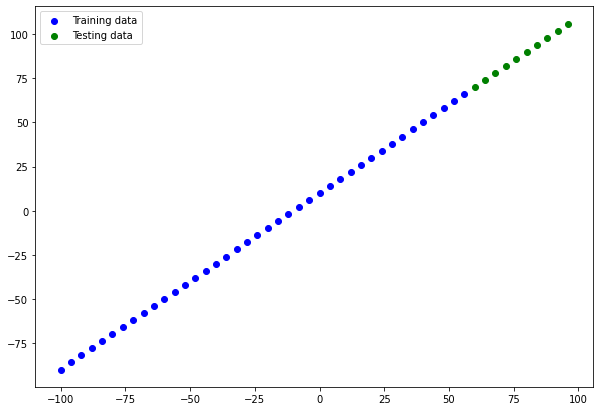

In [16]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [17]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]) # define the input_shape to our model
],name='model_1')

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output
     
     

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


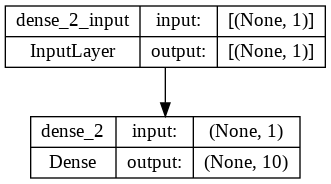

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [21]:
# Make predictions
y_preds = model.predict(X_test)


1/1 [==============================] - 0s 41ms/step


In [22]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

In [23]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 17.8589 - mae: 17.8589


[17.858936309814453, 17.858936309814453]

In [24]:
y_preds


array([[54.044533, 54.02488 , 53.87716 , 53.90119 , 54.000767, 54.05745 ,
        54.008244, 54.054672, 54.011875, 53.86953 ],
       [57.638332, 57.617825, 57.460434, 57.48584 , 57.592953, 57.652065,
        57.599453, 57.64872 , 57.604404, 57.452568],
       [61.232132, 61.21077 , 61.04371 , 61.070488, 61.18514 , 61.24668 ,
        61.190662, 61.242767, 61.196934, 61.035606],
       [64.825935, 64.80371 , 64.626976, 64.655136, 64.77732 , 64.8413  ,
        64.78187 , 64.836815, 64.78947 , 64.61865 ],
       [68.41973 , 68.39666 , 68.21025 , 68.23979 , 68.3695  , 68.43592 ,
        68.37307 , 68.43087 , 68.381996, 68.20169 ],
       [72.01353 , 71.9896  , 71.793526, 71.82444 , 71.961685, 72.03054 ,
        71.96428 , 72.02492 , 71.974525, 71.78473 ],
       [75.60733 , 75.58255 , 75.37679 , 75.40909 , 75.55387 , 75.62515 ,
        75.55549 , 75.618965, 75.567055, 75.36777 ],
       [79.201126, 79.1755  , 78.96007 , 78.993744, 79.14606 , 79.21977 ,
        79.1467  , 79.21301 , 79.1595

In [25]:
# Check the tensor shapes
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 10))

In [26]:
# What do they look like?
y_test, y_preds.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[54.044533, 54.02488 , 53.87716 , 53.90119 , 54.000767, 54.05745 ,
         54.008244, 54.054672, 54.011875, 53.86953 ],
        [57.638332, 57.617825, 57.460434, 57.48584 , 57.592953, 57.652065,
         57.599453, 57.64872 , 57.604404, 57.452568],
        [61.232132, 61.21077 , 61.04371 , 61.070488, 61.18514 , 61.24668 ,
         61.190662, 61.242767, 61.196934, 61.035606],
        [64.825935, 64.80371 , 64.626976, 64.655136, 64.77732 , 64.8413  ,
         64.78187 , 64.836815, 64.78947 , 64.61865 ],
        [68.41973 , 68.39666 , 68.21025 , 68.23979 , 68.3695  , 68.43592 ,
         68.37307 , 68.43087 , 68.381996, 68.20169 ],
        [72.01353 , 71.9896  , 71.793526, 71.82444 , 71.961685, 72.03054 ,
         71.96428 , 72.02492 , 71.974525, 71.78473 ],
        [75.60733 , 75.58255 , 75.37679 , 75.40909 , 75.55387 , 75.62515 ,
         75.55549 , 75.618965, 75

In [27]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae
     

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.01497 , 30.42474 , 26.834509, 23.244282, 19.654053, 16.466528,
       13.91157 , 11.950702, 10.630153,  9.976944], dtype=float32)>

In [28]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)


# Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.
Build model_1

In [29]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)
     

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 43ms/step


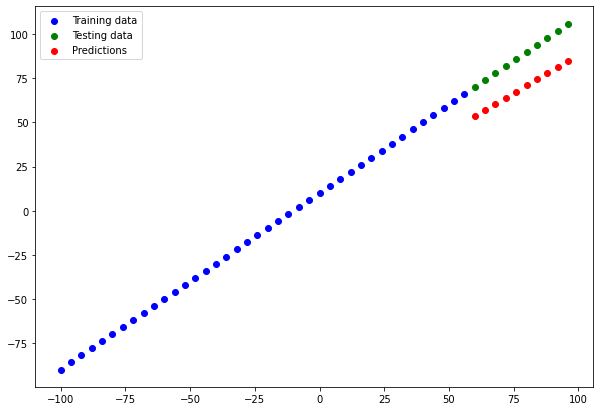

In [30]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [31]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1


(18.745327, 353.57336)

#Build model_2

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [32]:
# Set random seed
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])
# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae']
                ) 
# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 45ms/step


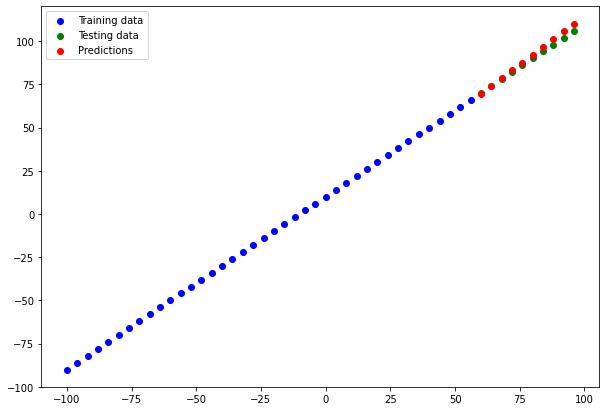

In [33]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [34]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

#Build model_3

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [35]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output
     


1/1 [==============================] - 0s 48ms/step


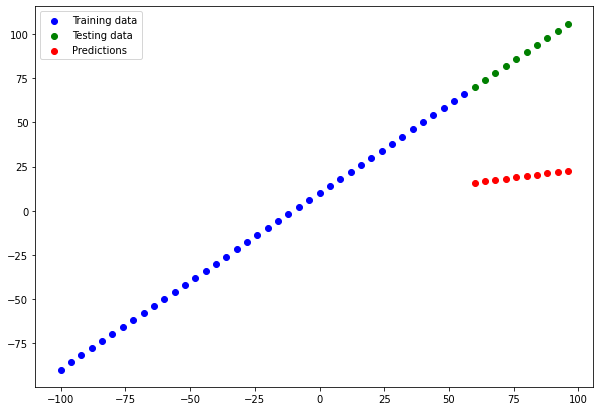

In [36]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)


In [37]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68784, 4804.469)

#Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [38]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [39]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results
     


,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770
2,model_3,68.687843,68.687843


#Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The SavedModel format (default).
The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [40]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [41]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


#Loading a model
We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [42]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 54ms/step


True

#A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

🔑 Note: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [44]:
# Import required libraries
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [45]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Check Dataset

In [46]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(insurance)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
--------------------     Data Shape     --------------------
(1338, 7)

--------------------  The First 5 Data  --------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705   

In [47]:
# Are there any duplicate rows in the dataframe? Let's check it!

duplicated = len(df[df.duplicated()])
print(f'There ara {duplicated} duplicated rows')
df = df.drop_duplicates()

There ara 0 duplicated rows


#Categorical variable and Numerical variable¶

In [48]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [49]:
cat_cols, num_cols, cat_but_car = grab_col_names(insurance)

Observations: 1338
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [50]:
print("Categorical Variable:", cat_cols)

Categorical Variable: ['sex', 'smoker', 'region', 'children']


In [51]:
print( "Numerical Variable:", num_cols)

Numerical Variable: ['age', 'bmi', 'charges']


#Check Outliers

In [52]:
# Lets analyze outliers:

def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

for col in num_cols:
    low_limit, up_limit = outlier_thresholds(insurance, col)
    print(low_limit, up_limit)

-51.0 133.0
-24.873974999999948 89.1770249999999
-69673.789264 119464.24272000001


In [53]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(insurance,col))

age False
bmi False
charges False


#EDA

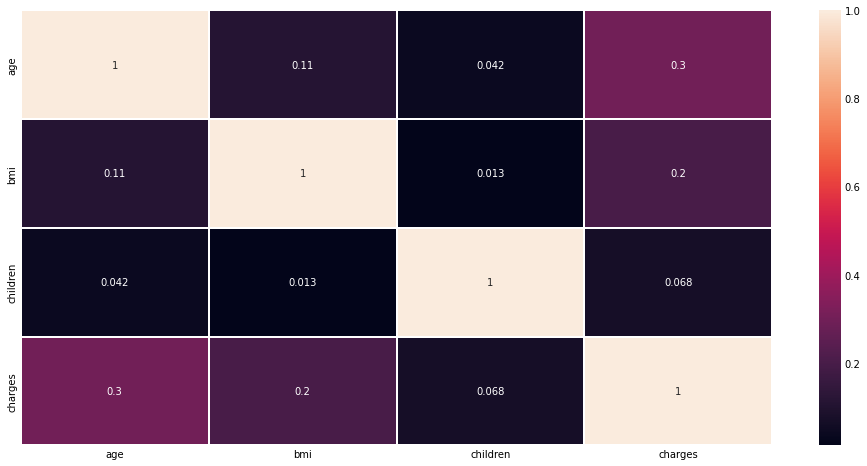

In [54]:
plt.figure(figsize = (15, 8))

sns.heatmap(insurance.corr(), annot = True, linewidths = 1)
plt.show()

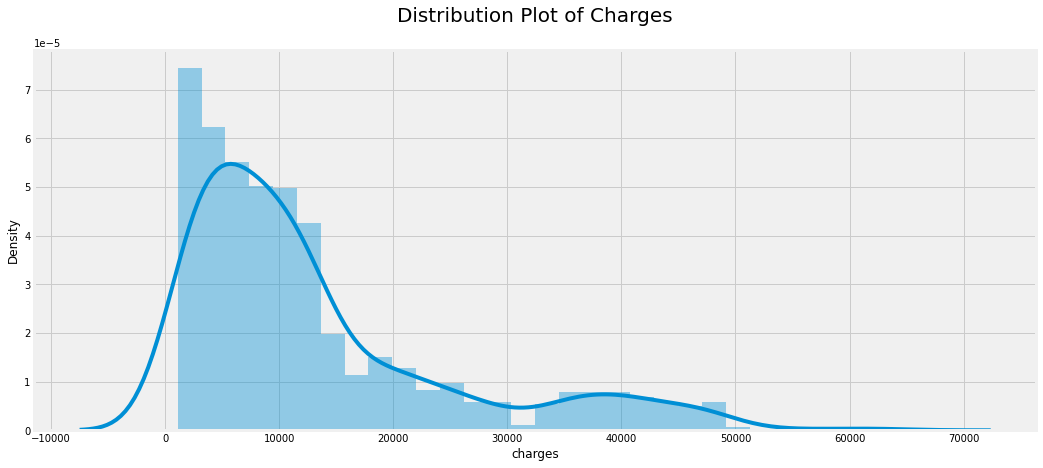

In [55]:
# distribution plot of charges column

plt.figure(figsize = (16, 7))
sns.distplot(insurance['charges'])
plt.title('Distribution Plot of Charges\n', fontsize =  20)
plt.show()

#From above plot we can say that Charges mainly lies under 15000

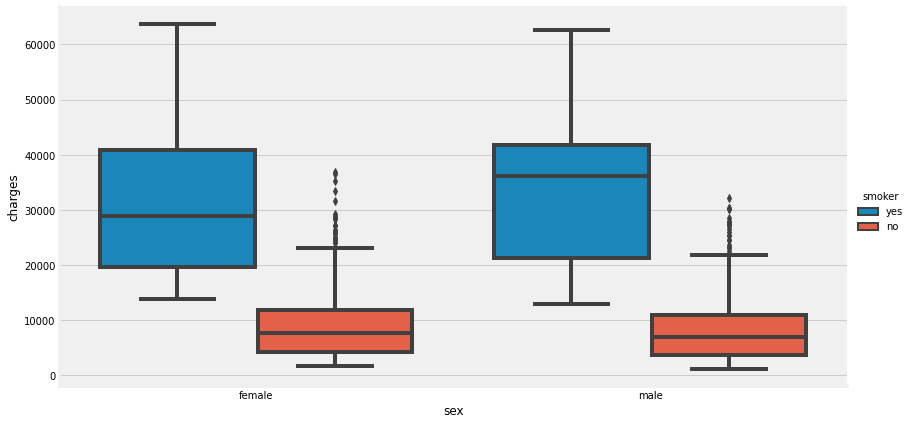

In [56]:
sns.catplot(x = 'sex', y = 'charges', hue = 'smoker', data = insurance, kind = 'box',
            height = 6, aspect = 2)
plt.show()

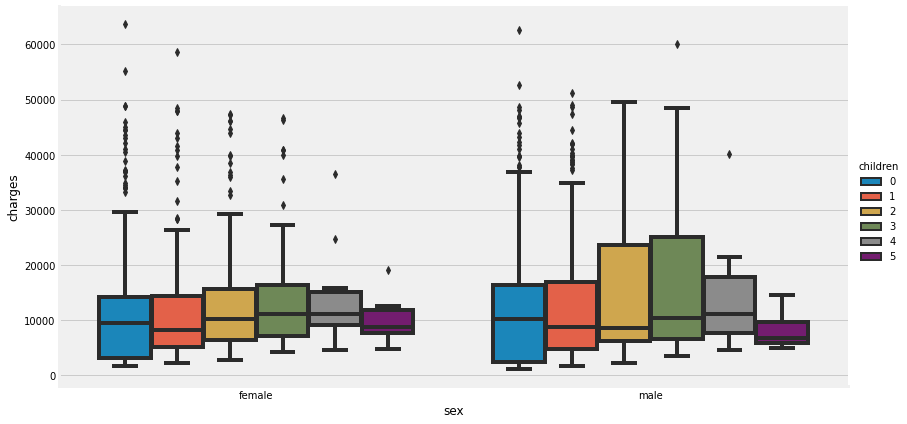

In [57]:
sns.catplot(x = 'sex', y = 'charges', hue = 'children', data = insurance, kind = 'box',
            height = 6, aspect = 2)
plt.show()

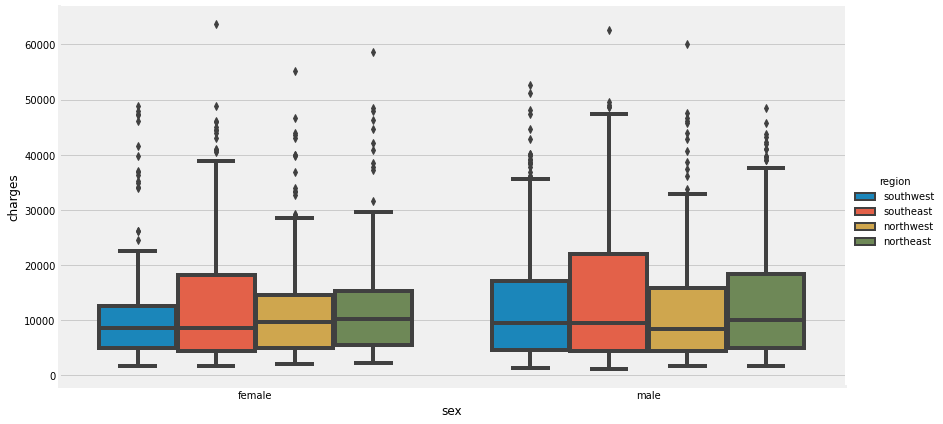

In [58]:
sns.catplot(x = 'sex', y = 'charges', hue = 'region', data = insurance, kind = 'box',
            height = 6, aspect = 2)
plt.show()

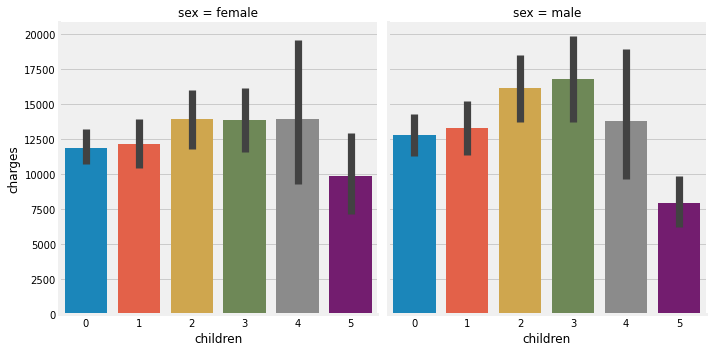

In [59]:
sns.catplot(x = 'children', y = 'charges', col = 'sex', data = insurance, kind = 'bar')
plt.show()

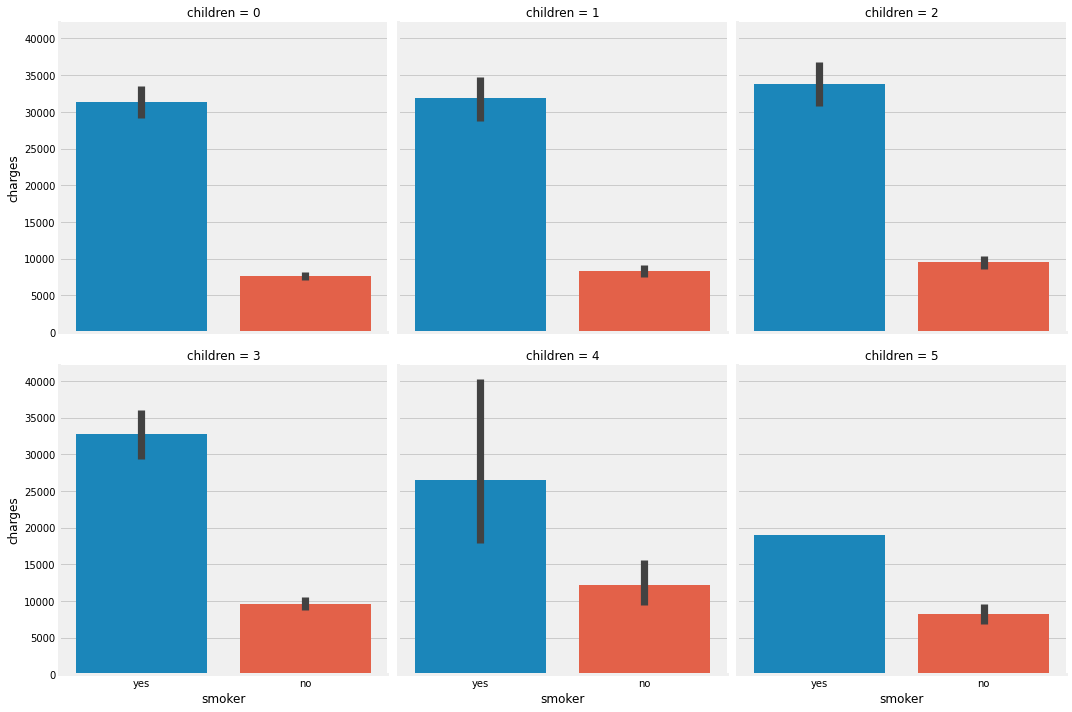

In [60]:
sns.catplot(x = 'smoker', y = 'charges', col = 'children', data = insurance, kind = 'bar', col_wrap = 3)
plt.show()

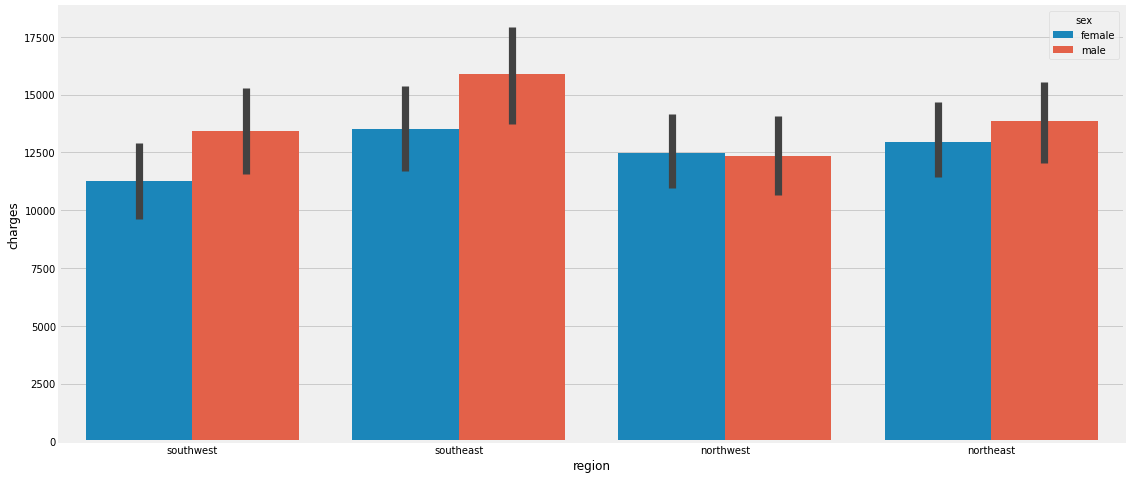

In [61]:
plt.figure(figsize = (17, 8))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = insurance)
plt.show()

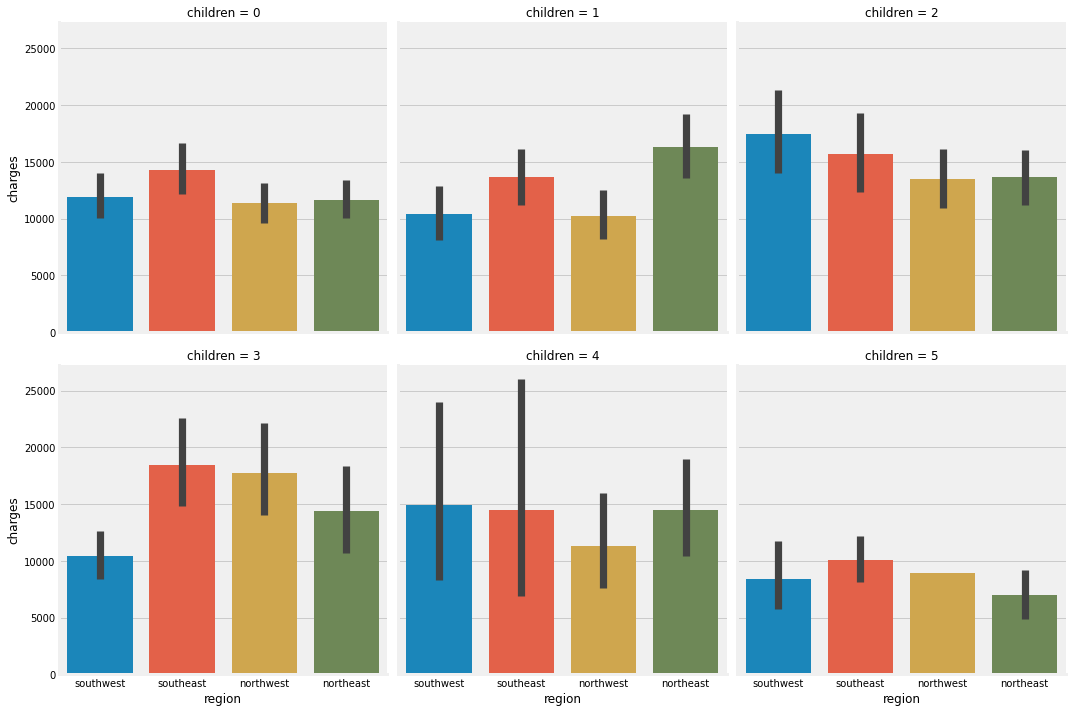

In [62]:
sns.catplot(x = 'region', y = 'charges', col = 'children', data = insurance, kind = 'bar', col_wrap = 3)
plt.show()

1. Highest no of patients are from southeast region.
2. Patients from northwest and southwest region pays higher charges.

#Data Preprocessing

In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [78]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [79]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [67]:
#load the datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [68]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [69]:
data.data.shape

(569, 30)

In [70]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

#TRAIN TEST SPLIT

In [71]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.3)

In [72]:
N,D = X_train.shape

#PREPROCESSING THE DATA

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss ='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 1.0068 - accuracy: 0.3065 - val_loss: 1.0845 - val_accuracy: 0.3333
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.8965 - accuracy: 0.3894 - val_loss: 0.9735 - val_accuracy: 0.4211
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.8022 - accuracy: 0.5000 - val_loss: 0.8726 - val_accuracy: 0.5439
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7180 - accuracy: 0.5905 - val_loss: 0.7862 - val_accuracy: 0.6257
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6459 - accuracy: 0.6533 - val_loss: 0.7120 - val_accuracy: 0.6725
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5866 - accuracy: 0.7286 - val_loss: 0.6479 - val_accuracy: 0.7310
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.7638 - val_loss: 0.5941 - val_accuracy: 0.7661
Epoch 8/100


In [75]:
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9766


[0.11678525805473328, 0.9766082167625427]

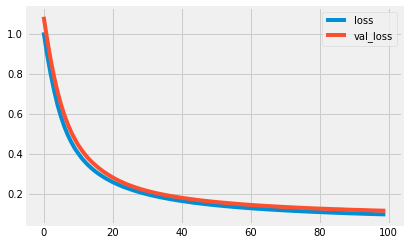

In [76]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()